Programación para la ciencia de datos
============================

--- 

SDSS-DR7 Dataset transformation
-----------------------------------------------------

In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
base_folder = os.getenv('PROJECT_TFM')
dt = pd.read_csv(base_folder+'\\data\\sdss\\SDSS7-valid.csv')
dt

,GAL_ID,ra,dec,x,y,z,redshift,dist,GROUP_ID
0,750,38.049133,0.224026,0.042016,0.032884,0.000209,0.054022,0.053355,68171
1,751,38.352526,0.212491,0.041685,0.032983,0.000197,0.053818,0.053156,23701
2,752,38.363598,0.210654,0.041857,0.033132,0.000196,0.054050,0.053383,23701
3,994,54.450341,0.572606,0.077946,0.109076,0.001340,0.138504,0.134071,68172
4,1010,54.534881,0.578615,0.072590,0.101899,0.001264,0.128955,0.125117,68173
...,...,...,...,...,...,...,...,...,...
639354,3000026,234.912679,21.782717,-0.021733,-0.030937,0.015109,0.041100,0.040715,21
639355,3000027,241.236111,23.932690,-0.014232,-0.025926,0.013126,0.032600,0.032358,148
639356,3000028,255.677051,34.059993,-0.019811,-0.077590,0.054136,0.098910,0.096661,192
639357,3000029,260.040191,27.668910,-0.024166,-0.137618,0.073260,0.164000,0.157765,3963


In [53]:
import math


H0 = 70 # Hubble constanst
def parse_distance_megaparsecs(d):
    '''
    Parse raw distances to h-1Mpc
    #977.8 coefficent for converting 1/H into Gyr (Hubble time)
    (H0/100) * d * 977.8 * 1000 /(3.262*H0)  
    '''
    #return  (H0/100) * d * 977.8 * 1000 /(3.262*H0)  
    return d * 977.8 * 10 /(3.262)

dt['x']  = dt['x'].map(lambda z: parse_distance_megaparsecs(z))
dt['y']  = dt['y'].map(lambda z: parse_distance_megaparsecs(z))
dt['z']  = dt['z'].map(lambda z: parse_distance_megaparsecs(z))

dt['dist'] = dt.apply(lambda row: (row.x**2 + row.y**2 + row.z**2)**(1/2), axis=1)
#df_subset = df_subset.query('distt <= 375')
#df_subset = df_subset.query('distt >= 61')
dt

,GAL_ID,ra,dec,x,y,z,redshift,dist,GROUP_ID
0,750,38.049133,0.224026,125.944104,98.572360,0.625338,0.054022,159.933795,68171
1,751,38.352526,0.212491,124.952785,98.867896,0.590928,0.053818,159.337405,23701
2,752,38.363598,0.210654,125.467096,99.314269,0.588320,0.054050,160.017694,23701
3,994,54.450341,0.572606,233.646668,326.960755,4.016301,0.138504,401.883356,68172
4,1010,54.534881,0.578615,217.592851,305.447085,3.787417,0.128955,375.045218,68173
...,...,...,...,...,...,...,...,...,...
639354,3000026,234.912679,21.782717,-65.144581,-92.734977,45.288947,0.041100,122.043767,21
639355,3000027,241.236111,23.932690,-42.660457,-77.715064,39.346610,0.032600,96.993306,148
639356,3000028,255.677051,34.059993,-59.383222,-232.580414,162.276120,0.098910,289.747399,192
639357,3000029,260.040191,27.668910,-72.439330,-412.515756,219.599674,0.164000,472.906674,3963


In [70]:
min_ra = 120
max_ra = 145
min_dec = 10
max_dec = 25
min_dist = 30
max_dist = 340

In [71]:
df_subset = dt.query('dist <= {}'.format(max_dist))
df_subset = df_subset.query('dist >= {}'.format(min_dist))

df_subset = df_subset.query('ra >= {}'.format(min_ra))
df_subset = df_subset.query('ra <= {}'.format(max_ra))

df_subset = df_subset.query('dec >= {}'.format(min_dec))
df_subset = df_subset.query('dec <= {}'.format(max_dec))
data = df_subset
data

,GAL_ID,ra,dec,x,y,z,redshift,dist,GROUP_ID
251722,1034947,120.184192,24.533115,-88.917707,152.872919,80.719392,0.065846,194.401924,229033
251723,1034948,120.120893,24.552716,-21.254861,36.635762,19.349379,0.015590,46.565509,229034
251724,1034950,120.251171,24.639847,-63.624074,109.092877,57.926559,0.046853,138.941588,229035
251725,1034951,120.331856,24.547580,-58.470970,99.933479,52.881221,0.042883,127.286992,10269
251726,1034952,120.320754,24.561235,-149.050735,254.857796,134.931393,0.111137,324.615308,229036
...,...,...,...,...,...,...,...,...,...
639039,2505888,144.719105,14.695091,-93.336655,66.039323,29.985250,0.039795,118.203378,472242
639041,2505892,144.771646,14.782551,-177.933144,125.649942,57.481116,0.076496,225.282468,472244
639042,2505893,144.803314,14.650089,-192.940050,136.087521,61.721265,0.082992,244.039322,472245
639043,2505896,144.822559,14.679616,-191.847247,135.220252,61.486390,0.082504,242.632354,472246


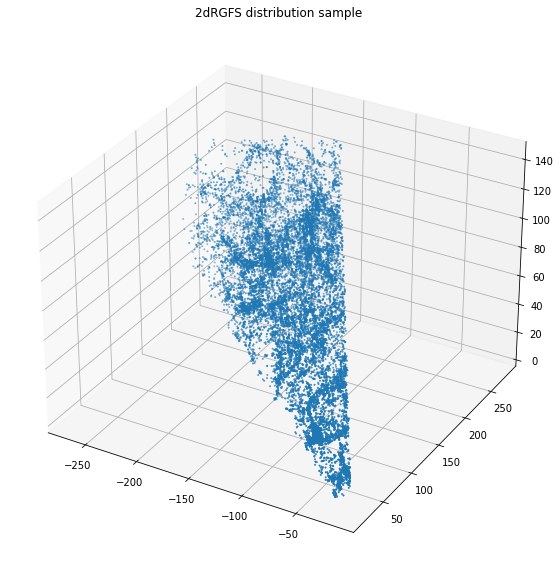

In [72]:

xx = data['x']
yx = data['y']
zx = data['z']

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.title("2dRGFS distribution sample")
ax.scatter(xx, yx, zx, s=2, linewidth=0.5)
plt.show()

In [73]:
def to_radians(angle):
    return (angle * math.pi / 180)


min_ra_rad = to_radians(min_ra)
max_ra_rad = to_radians(max_ra)
min_dec_rad = to_radians(min_dec)
max_dec_rad = to_radians(max_dec)

In [74]:
# Podemos hacer el ejercicio usando las funciones de numpy
import numpy as np
import matplotlib.pyplot as plt

# Para cada diferencial de volumen queremos el mismo número de galaxias.
# dV = d(ro^3/3)d(sin(dec))d(ra)  --> para angúlos pequeños sin(dec) ~ dec

def ro_t(x):
    """ returns the result of x^3/3 """
    return x**3/3

# definimos función para generar el catálogo simulado

def simulateCatalog(limits, n_gal, plotRho = False):
    """A simulated catalogue of n_gal galaxies is returned in the given limits
    
       Args:
         limits: (:obj:`dict`): with keys "Dist_min", "Dist_max", "dec_min","dec_max","ra_min","ra_max"
         n_gal:  (:obj:`int`)
         
       Optional Args:
         plotRho: (:obj:`boolean`): Returns plot to see distribution of rho. 
                  
       Retruns:
         pos_cat: (:obj:`numpy array` with shape n_gal x 3): position in cartesian coordinates of the n_gal galaxies
    
    """
    if not isinstance(limits, dict):
        print('Input must by a dictionary')
        return False
    else:
        if "Dist_min" not in limits or "Dist_max" not in limits:
             raise AssertionError('Dist_min and Dist_max keys must be given')
        if "dec_min" not in limits or  "dec_max" not in limits:
             raise AssertionError('dec_min and dec_max keys must be given')
        if "ra_min" not in limits or "ra_max" not in limits:
             raise AssertionError('ra_min and ra_max keys must be given')
                   
        # Generem nombres aleatoris uniformes, amb els límits imposats 
        # i el mateix número de galàxies que el catàleg real
        ro3 = np.random.uniform(low=ro_t(limits["Dist_min"]),
                        high=ro_t(limits["Dist_max"]), size=n_gal)  
        dec = np.random.uniform(low=limits["dec_min"],
                        high=limits["dec_max"], size=n_gal)
        ra = np.random.uniform(low=limits["ra_min"],
                        high=limits["ra_max"], size=n_gal)

        # Volvemos a las coordenadas ecuatoriales 
        ro = (3*ro3)**(1/3)
        #ro = (ro3)**(1/2)
        
        if plotRho:
            _ = plt.hist(ro)  # ( _ = added to avoid unnecesary text with plot info )
            plt.xlabel(r'$\rho$')
            plt.ylabel('Number of galaxies')

        # Convertimos a coordenadas cartesianas y agrupamos en vectores
        x_cat = ro * np.cos(dec) * np.cos(ra)
        y_cat = ro * np.cos(dec) * np.sin(ra)
        z_cat = ro * np.sin(dec)
        pos_cat = np.column_stack((x_cat, y_cat, z_cat))
        
        return pos_cat 

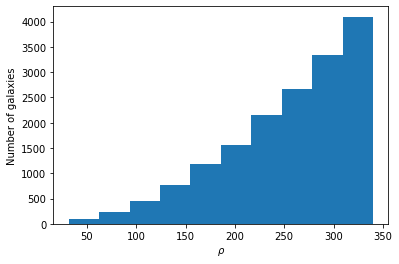

In [75]:
limits = {'ra_min': min_ra_rad, 'ra_max': max_ra_rad,
          "dec_min": min_dec_rad, "dec_max": max_dec_rad,
          "Dist_min": min_dist, "Dist_max": max_dist}

p_cat = simulateCatalog(limits, len(data), plotRho = True)

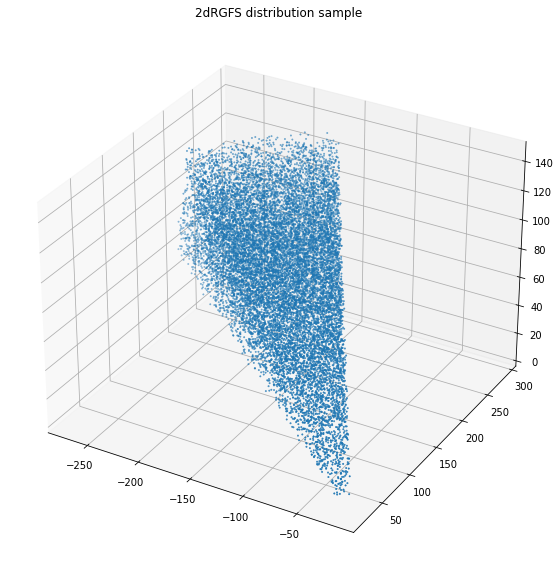

In [76]:
xx = list()
yx = list()
zx = list()
for p in p_cat:
    xx.append(p[0])
    yx.append(p[1])
    zx.append(p[2])

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.title("2dRGFS distribution sample")
ax.scatter(xx, yx, zx, s=2, linewidth=0.5)
plt.show()

In [77]:
# Tenemos que calcular el número de galaxias que hay a cierta distancia, tanto del catálogo real como del
# catálogo aleatorio. Utilizaremos Counter del módulo collections

from collections import Counter


# Definimos la distancia entre 2 puntos 
def dist3D(p1, p2):
    """ compute euclidian distance between two points p1 and p2"""
    if len(p1) != len(p2):
        raise AssertionError("x1 and x2 must be equal")
    suma = sum([(p1[i]-p2[i])**2 for i in range(len(p1))])
    return np.sqrt(suma)


# Generamos vectores con las coordenadas 
p = np.column_stack((np.array(data["x"]),
                     np.array(data["y"]), np.array(data["z"])))

# Generamos bines entre distancia mínima y máximacon pasos de uno en uno
maxDist = 350
dr = 1   # esogemos dr = 1 
bins = np.arange(0, maxDist, dr)  # generamos intérvalos de distancia


for i in range(len(p)):
    distances = np.array([dist3D(p[i], p[j]) for j in range(i+1, len(p))])
    distances_cat = np.array([dist3D(p_cat[i], p_cat[j]) for j in range(i+1, len(p))])

    digitized = np.digitize(distances, bins)          # colocamos cada distancia a su intérvalo
    digitized_cat = np.digitize(distances_cat, bins)  

    if i == 0:
        DDc = Counter(digitized)       # utilizamos Counter para contar cuantas distancias hay iguales
        RRc = Counter(digitized_cat)

    else:
        DDc.update(digitized)          # actualizamos contadores
        RRc.update(digitized_cat)

# Ordenamos DDc i RRc
DDsorted = {k: v for k, v in sorted(DDc.items())}
RRsorted = {k: v for k, v in sorted(RRc.items())}

# Lo pasamos a listas
r = list(DDsorted.keys())     # distancia
DD = list(DDsorted.values())  # número de pares del catálogo real
RR = list(RRsorted.values())  # número de pares del catálogo simulado

In [79]:
print(len(DD))
print(len(RR))

312
311


In [80]:
print(len(DD))
print(len(RR))
minimal = min(len(DD),len(RR))

if minimal <  len(DD):
    for i in list(range(len(DD)- minimal)):
        DD.pop()
        r.pop()
if minimal <  len(RR):
    for i in list(range(len(RR)- minimal)):
        RR.pop()
if minimal <  len(r):
    for i in list(range(len(r)- minimal)):
        r.pop()


312
311


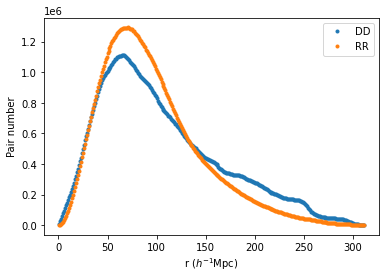

In [81]:
plt.plot(r, DD, '.', label='DD')
plt.plot(r, RR, '.', label='RR')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel('Pair number')
plt.legend()

(-0.3, 2.0)

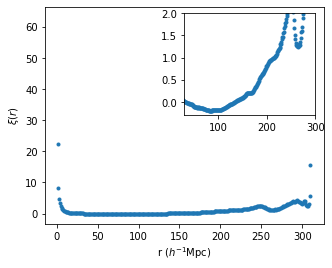

In [82]:
# Calculamos estimador natural
corr = np.array(DD)/np.array(RR) - 1

# Hacemos los gráficos
fig, ax = plt.subplots(figsize=[5, 4])
# Fem el gràfic
ax.plot(r, corr, '.')
ax.set_xlabel("r ($h^{-1}$Mpc)")
ax.set_ylabel(r"$\xi(r)$")

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.plot(r, corr, '.')
# sub region of the original image
x1, x2, y1, y2 = 30, 300, -0.3, 2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#_ = axins.annotate("La posició i amplitut d'aquest pic depenen del model cosmològic",
#                   xy=(90, 0.15), xycoords='data',
#                   xytext=(0.3, 0.3), textcoords='data',
#                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
#                   )